# Tugas Modul Model Training and Evaluation

Dalam sebuah rapat di Rumah Sakit Kota Ayodya, tim dokter sedang mencari cara untuk meningkatkan deteksi dini penyakit jantung pada pasien mereka. Mereka mengetahui bahwa penyakit jantung adalah penyebab kematian pertama di dunia dan bertanggung jawab atas sekitar 31% dari total kematian. Tim dokter ingin menggunakan machine learning untuk membantu mereka memprediksi 
kemungkinan pasien mengalami penyakit jantung berdasarkan parameter input seperti jenis kelamin, usia, jenis nyeri dada, dan berbagai pengukuran ECG.

Untuk mencapai tujuan ini, tim dokter bekerja sama dengan tim anda untuk mengumpulkan data dari pasien rumah sakit. Data yang dikumpulkan meliputi informasi tentang usia, jenis kelamin, jenis nyeri  dada saat berolahraga, nilai puncak dan Lembah saat pengukuran ECG. Setelah data dikumpulkan, tim anda menggunakan dataset untuk melatih model machine learning. Model ini nantinya akan diuji coba pada data pasien rumah sakit.

Instruksi dari pimpinan tim data scientis yang Anda terima adalah sebagai berikut:

Selamat datang untuk rekan-rekan baru tim data scientist. Berikut adalah instruksi yang dapat saya berikan untuk membuat model machine learning menggunakan algoritma Random Forest (RF),  Gradient Boosting Trees (GBT), SVM dengan kernel RBF, SVM dengan kernel Polynomial:
1. Pahami dataset: 
Sebelum memulai pembuatan model, pastikan Anda memahami dataset yang akan digunakan. Periksa apakah terdapat missing value.
2. Tentukan fitur dan target: 
Sebagai awalan, kita akan menggunakan semua fitur yang sudah ditentukan oleh tim dokter. Tentukan fitur dan target yang akan digunakan untuk melatih model. Untuk nilai parameter **random_state** pada pemisahan dataset disesuaikan dengan dua digit terakhir nomor pegawai Anda (random state: **dua digit terakhir NPM**).
3. Buat model Random Forest: 
Gunakan library scikit-learn untuk membuat model Random Forest. Anda diperbolehkan untuk menyesuaikan parameter seperti max_depth dan n_estimators agar model dapat bekerja dengan baik pada dataset. Untuk nilai parameter **random_state** pada pemisahan dataset disesuaikan dengan dua digit terakhir nomor pegawai Anda (random state: **dua atau 1 digit terakhir NPM**).
4. Buat model Gradient Boosting Trees (GBT): 
Gunakan library scikit-learn untuk membuat model Gradient Boosting Trees. Anda diperbolehkan untuk menyesuaikan parameter seperti max_depth, n_estimators, dan learning_rate agar model dapat bekerja dengan baik pada dataset. Untuk nilai parameter **random_state** pada pemisahan dataset disesuaikan dengan dua digit terakhir nomor pegawai Anda (random state: **dua atau 1 digit terakhir NPM**).
5. Buat model SVM RBF :
Gunakan library scikit-learn untuk membuat model SVM dengan kernel RBF. Anda diperbolehkan untuk menyesuaikan parameter seperti C dan gamma agar model dapat bekerja dengan baik pada dataset. Untuk nilai parameter **random_state** pada pemisahan dataset disesuaikan dengan dua digit terakhir nomor pegawai Anda (random state: **dua atau 1 digit terakhir NPM**).
6. Buat model SVM Polynomial:
Gunakan library scikit-learn untuk membuat model SVM dengan kernel Polynomial. Anda diperbolehkan untuk menyesuaikan parameter seperti C dan gamma agar model dapat bekerja dengan baik pada dataset.Untuk nilai parameter **random_state** pada pemisahan dataset disesuaikan dengan dua digit terakhir nomor pegawai Anda (random state: **dua atau 1 digit terakhir NPM**).
5. Evaluasi model:
Setelah membuat kedua model, lakukan evaluasi untuk mengetahui performa masing-masing model. Semoga instruksi ini dapat membantu anggota baru dalam membuat model machine learning menggunakan algoritma SVM RBF,  SVM Polynomial, Random Forest,dan Gradient Boosting Trees (GBT). Jika ada pertanyaan atau kesulitan, jangan ragu untuk menghubungi Dosen dan Asisten Dosen
6. Buat Interface Streamlit: 
Setelah model tersimpan, buat antarmuka yang dapat digunakan oleh tim dokter Kota Ayodya untuk memprediksi kemungkinan seseorang terkena penyakit jantung.


- Tahap pertama adalah load dataset berdasarkan path di mana dataset disimpan.
- Karena dataset dalam bentuk file CSV, kita menggunakan fungsi `read_csv` dari Pandas.

In [2]:
import pandas as pd
import numpy as np

#Baca dataset dengan menggunakan function read_csv dari pandas
df_heart=pd.read_csv('Heart_Modul2.csv')
df_heart.head(20)



,Name,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,Jo,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,Kimmi,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,Kimmi,37,Bi,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,Surya,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,Maria,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
5,Maria,39,M,NAP,120,339.0,0,Normal,170,N,0.0,Up,0
6,Surya,45,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,0
7,Kimmi,54,M,ATA,110,208.0,0,Normal,142,N,0.0,Up,0
8,Maria,37,M,ASY,140,207.0,0,Normal,130,Y,1.5,Flat,1
9,Maria,48,F,ATA,120,284.0,0,Normal,120,N,0.0,Up,0


## Drop Fitur
- drop fitur yang tidak relevan dengan pelatihan model

In [3]:
df_heart2=df_heart.drop('Name',axis=1)
df_heart2.head(50)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,Bi,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339.0,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208.0,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207.0,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284.0,0,Normal,120,N,0.0,Up,0


- menghitung frekuensi atau jumlah kemunculan masing-masing kategori unik dalam kolom ChestPainType pada dataframe df_heart2

In [4]:
df_heart2['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    209
ATA    173
TA      46
Name: count, dtype: int64

- Data yang hilang akan membuat model menjadi error, untuk itu kita perlu menanganinya.
- Kita dapat melakukan pengecekan pada data apabila ada data yang bernilai null, kosong, atau NaN dengan cara seperti berikut:

In [5]:
#gunakan fungsi 1isnull, empty, dan isna untuk mengecek data kosong
print("data null \n",df_heart2.isnull().sum())
print("\ndata kosong \n",df_heart2.empty)
print("\ndata nan \n",df_heart2.isna().sum()) 

data null 
 Age                0
Sex                0
ChestPainType      0
RestingBP          0
Cholesterol       10
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

data kosong 
 False

data nan 
 Age                0
Sex                0
ChestPainType      0
RestingBP          0
Cholesterol       10
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64


## Pengisian Data yang kosong (Missing Value)
- karena fitur Cholesterol memiliki banyak data yang kosong, kita akan mengisi data yang kosong dengan nilai median/
- median relatif aman digunakan untuk mengisi kolom fitur yang tidak kita ketahui normalitas sebaran datanya.

In [6]:
#ambil nilai median dan muat ke dalam variabel
median_chole = df_heart2['Cholesterol'].median()

print(median_chole)

#gunakan fungsi fillna untuk mengisi data kosong menggunakan median
df_heart2['Cholesterol'] = df_heart2['Cholesterol'].fillna(median_chole)


222.0


In [7]:
#gunakan fungsi value_counts untuk mengecek apakah masih ada nilai Cholesterol yang kosong
print(df_heart2['Cholesterol'].value_counts()) 

#cek kembali apakah masih ada data yang kosong atau tidak
print("data null \n",df_heart2.isnull().sum())
print("\ndata kosong \n",df_heart2.empty)
print("\ndata nan \n",df_heart2.isna().sum()) 

Cholesterol
0.0      172
222.0     16
254.0     11
220.0     10
204.0      9
        ... 
344.0      1
347.0      1
412.0      1
529.0      1
131.0      1
Name: count, Length: 221, dtype: int64
data null 
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

data kosong 
 False

data nan 
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## Drop data yang kosong (Missing Value)
- kita dapat menghapus sampel data yang tidak memiliki salah satu fitur dengan fungsi dropna dan parameter how diisi dengan 'any'

In [8]:
#drop data yang memiliki missing value
print("Sebelum drop missing value",df_heart2.shape)
df_heart2 = df_heart2.dropna(how="any",inplace=False)
print("Sesudah drop missing value" ,df_heart2.shape) 

Sebelum drop missing value (924, 12)
Sesudah drop missing value (924, 12)


In [9]:
df_heart2['Sex'].value_counts()

Sex
M     729
F     193
Bi      2
Name: count, dtype: int64

- kita dapat menghapus atau mengecualikan (exclude) data yang tidak sesuai dengan operasi logika di Dataframe Pandas

In [10]:
#menghapus data gender selain Male dan Female
print("Sebelum drop data dengan gender Bi ",df_heart2.shape)
#gunakan operator tidak sama dengan (!=) terhadap Bi untuk memilih data dengan gender Male dan Female
df_heart2=df_heart2[df_heart2['Sex']!='Bi']
print("Sesudah drop data dengan gender Bi ",df_heart2.shape)

Sebelum drop data dengan gender Bi  (924, 12)
Sesudah drop data dengan gender Bi  (922, 12)


In [11]:
df_heart2.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339.0,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208.0,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207.0,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284.0,0,Normal,120,N,0.0,Up,0
10,37,F,NAP,130,211.0,0,Normal,142,N,0.0,Up,0


## Pengecekan Data Duplikat
- setelah data dibersihkan, kita perlu mengecek apakah ada data yang duplikat/kembar pada sampel-sampel yang ada.

In [12]:
#pengecekan data duplikat
print("Sebelum Pengecekan data duplikat, ", df_heart2.shape)
df_heart3=df_heart2.drop_duplicates(keep='last')
print("Setelah Pengecekan data duplikat, ", df_heart3.shape)

Sebelum Pengecekan data duplikat,  (922, 12)
Setelah Pengecekan data duplikat,  (916, 12)


## Train and Test Split
- Tentukan fitur dan targer/label yang akan kita gunakan dari dataFrame.
- lakukan Train-Test Split dengan random_state dan nilai persentase pembagian yang sudah ditentukan/


In [13]:
from sklearn.model_selection import train_test_split
x = df_heart3.drop(columns=['HeartDisease'],axis=1)
y = y=df_heart3['HeartDisease'] 

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)##random state menggunakan 
                                                                                    ##2 digit npm terakhir
print(x_train.shape)
print(x_test.shape)


(687, 11)
(229, 11)


## Data Encoding
#### One Hot Encoder
-  One Hot Encoder diterapkan pada fitur X_train dan X_test yang bersifat kategorik dan biasanya bertipe string
- Import One Hot Encoder dari sublibrary preprocessing scikit-learn.
- Buat objek encoder dan kombinasikan dengan make_column_transformer
- Transformer membantu kita mengubah kolom fitur tertentu saja yang diubah dari string kategorik menjadi kolom baru

In [14]:
#import OneHotEncoder dan make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


#tentukan kolom kategorik yang akan diubah
kolom_kategori=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

#buat objek transformer yang berisi OneHotEncoder
transform = make_column_transformer(
    (OneHotEncoder(),kolom_kategori),remainder='passthrough'
)


In [15]:
#buat varibel baru untk menampung hadil transformasi kolom
x_train_enc=transform.fit_transform(x_train)
#khusus untuk train set gunakan fungsi fit_transform, untuk test set gunakan transform saja
x_test_enc=transform.fit_transform(x_test)

#jika ingin melihat hasil dari transformasi, muat dalam dataframe
df_train_enc=pd.DataFrame(x_train_enc,columns=transform.get_feature_names_out())
df_test_enc=pd.DataFrame(x_test_enc,columns=transform.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)


,onehotencoder__Sex_F,onehotencoder__Sex_M,onehotencoder__ChestPainType_ASY,onehotencoder__ChestPainType_ATA,onehotencoder__ChestPainType_NAP,onehotencoder__ChestPainType_TA,onehotencoder__RestingECG_LVH,onehotencoder__RestingECG_Normal,onehotencoder__RestingECG_ST,onehotencoder__ExerciseAngina_N,onehotencoder__ExerciseAngina_Y,onehotencoder__ST_Slope_Down,onehotencoder__ST_Slope_Flat,onehotencoder__ST_Slope_Up,remainder__Age,remainder__RestingBP,remainder__Cholesterol,remainder__FastingBS,remainder__MaxHR,remainder__Oldpeak
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,53.0,120.0,274.0,0.0,130.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,52.0,152.0,298.0,1.0,178.0,1.2
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,43.0,120.0,249.0,0.0,176.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,34.0,118.0,210.0,0.0,192.0,0.7
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,50.0,120.0,168.0,0.0,160.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,73.0,160.0,0.0,0.0,121.0,0.0
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,58.0,130.0,213.0,0.0,140.0,0.0
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,57.0,130.0,131.0,0.0,115.0,1.2
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,65.0,130.0,275.0,0.0,115.0,1.0
9,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,38.0,110.0,196.0,0.0,166.0,0.0


## Pipeline
- Import objek Pipeline dari library dan buatlah objek tersebut
- Buatlah objek dari algoritme yang akan dilatih. 
- Tentukan langkah-langkah pemodelan dari data scaling, feature selection hingga penentuan algoritme pengklasifikasi.
- Tentukan parameter grid dari langkah-langkah yang digunakan seperti jumlah feature yang dipilih dan parameter dari algoritme yang akan dilatih. 
- Gunakan fungsi fit untuk melatih model berdasarkan kombinasi langkah-langkah pemodelan dan parameter yang telah ditentukan.
- Gunakan confusion matrix dan classification report untuk mengevaluasi performa model. 

In [16]:
#import library yang dibutuhkan untuk pipeline, GSCV, dan metrik evaluasi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectPercentile ,SelectKBest
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#buat rancangan pipeline mulai dari data scaling hingga classifier
pipe_svm = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feat_select', SelectKBest()),
    ('clf', SVC(class_weight='balanced'))
])

#buat parameter grid untuk step feature selection dan classifier
params_grid_svm = [
    {
    'scale': [MinMaxScaler()],
    'feat_select__k':np.arange(2,6),
    'clf__kernel':['poly','rbf'],
    'clf__C':[0.1,1],
    'clf__gamma':[0.1, 1]
    
    },
    {
        'scale': [MinMaxScaler()],
        'feat_select':[SelectPercentile()],
        'feat_select__percentile':np.arange(20,50),
        'clf__kernel':['poly','rbf'],
         'clf__C':[ 0.1, 1],
    'clf__gamma':[0.1, 1]
    },
    {
    'scale': [StandardScaler()],
    'feat_select__k':np.arange(2,6),
    'clf__kernel':['poly','rbf'],
     'clf__C':[0.1, 1],
    'clf__gamma':[0.1, 1]
    
    },
    {
        'scale': [StandardScaler()],
        'feat_select':[SelectPercentile()],
        'feat_select__percentile':np.arange(20,50),
        'clf__kernel':['poly','rbf'],
         'clf__C':[0.1, 1],
    'clf__gamma':[0.1, 1]
    }
]
#muat rancangan pipeline ke dalam objek pipeline
estimator_svm = Pipeline(pipe_svm)
#muat pipeline dan parameter gri ke dalam objek GSCV dengan Stratified 5-fold CV
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)#RANDOM STATE MENGGUNAKAN 2 atau 1 DIGIT 
                                                                ##terakhir NPM MASING MASING
GSCV_SVM = GridSearchCV(pipe_svm, params_grid_svm, cv=SKF)
#jalankan objek GSC untuk melatih model dengan train set menggunakan fungsi fit
GSCV_SVM.fit(x_train_enc, y_train)
print("GSCV training finished")
#64min

GSCV training finished


CV Score : 0.8602560033851688
Test Score: 0.7903930131004366
Best model: Pipeline(steps=[('scale', StandardScaler()),
                ('feat_select', SelectPercentile(percentile=45)),
                ('clf',
                 SVC(C=0.1, class_weight='balanced', gamma=0.1,
                     kernel='poly'))])
Best features: Index(['onehotencoder__ChestPainType_ASY', 'onehotencoder__ChestPainType_ATA',
       'onehotencoder__ExerciseAngina_N', 'onehotencoder__ExerciseAngina_Y',
       'onehotencoder__ST_Slope_Flat', 'onehotencoder__ST_Slope_Up',
       'remainder__Age', 'remainder__MaxHR', 'remainder__Oldpeak'],
      dtype='object')


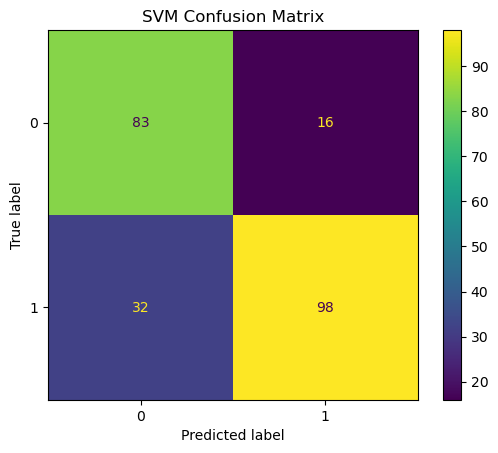

Classification report SVM:
               precision    recall  f1-score   support

           0       0.72      0.84      0.78        99
           1       0.86      0.75      0.80       130

    accuracy                           0.79       229
   macro avg       0.79      0.80      0.79       229
weighted avg       0.80      0.79      0.79       229



In [17]:
#tampilkan skor cross-validation
print("CV Score : {}".format(GSCV_SVM.best_score_))
#tampilkan skor model terbaik GSCV pada test set
print("Test Score: {}".format(GSCV_SVM.best_estimator_.score(x_test_enc, y_test)))
#tampilkan best model dan best features
print("Best model:", GSCV_SVM.best_estimator_)
mask = GSCV_SVM.best_estimator_.named_steps['feat_select'].get_support()
print("Best features:", df_train_enc.columns[mask])

#buat prediksi dari test set
SVM_pred = GSCV_SVM.predict(x_test_enc)

import matplotlib.pyplot as plt
#buat confusion matrix
cm = confusion_matrix(y_test, SVM_pred, labels=GSCV_SVM.classes_)
#buat confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_SVM.classes_)
disp.plot()
plt.title("SVM Confusion Matrix")
plt.show()

#tampilkan classification report
print("Classification report SVM:\n", classification_report(y_test, SVM_pred))


In [18]:
#import library yang dibutuhkan
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

#buat rancangan pipeline mulai dari data scaling hingga classifier
pipe_RF=[('data scaling', StandardScaler()),
         ('feature select', SelectKBest()),
         ('clf',RandomForestClassifier(random_state=0,class_weight='balanced'))]##random state pakai 2 digit npm terakhir

#buat parameter grid untuk step feature selection dan classifier
params_grid_RF = [{
                'data scaling': [StandardScaler()],  
                'feature select__k': np.arange(2, 6), 
                'clf__max_depth': np.arange(4, 5),  
                'clf__n_estimators': [100, 150] 
                },
                {
                    'data scaling': [StandardScaler()],  
                    'feature select': [SelectPercentile()],  
                    'feature select__percentile': np.arange(20, 50),  
                    'clf__max_depth': np.arange(4, 5),  
                    'clf__n_estimators': [100, 150]  
                    },
                    {
                'data scaling': [MinMaxScaler()],  
                'feature select__k': np.arange(2, 6),  
                'clf__max_depth': np.arange(4,5),  
                'clf__n_estimators': [100, 150]  
                },
                {
                    'data scaling': [MinMaxScaler()],  
                    'feature select': [SelectPercentile()],  
                    'feature select__percentile': np.arange(20, 50),  
                    'clf__max_depth': np.arange(4, 5),  
                    'clf__n_estimators': [100, 150]   
                    }]

#muat tancangan pipeline ke dalam objek pipeline
estimator_RF = Pipeline(pipe_RF)
#muat pipeline dan parameter grid ke dalam objek GSCV dengan Stratified 5-fold CV
GSCV_RF=GridSearchCV(estimator_RF,params_grid_RF,cv=SKF)
#jalankan objek GSCV untuk melatih model dengan train set menggunakan fungsi fit
GSCV_RF.fit(x_train_enc,y_train)
print("GSCV training finishhed")

GSCV training finishhed


CV Score: 0.8617793293134455
Test Score: 0.7947598253275109
Best model: Pipeline(steps=[('data scaling', StandardScaler()),
                ('feature select', SelectPercentile(percentile=37)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        n_estimators=150, random_state=0))])
Best features: Index(['onehotencoder__ChestPainType_ASY', 'onehotencoder__ChestPainType_ATA',
       'onehotencoder__ExerciseAngina_N', 'onehotencoder__ExerciseAngina_Y',
       'onehotencoder__ST_Slope_Flat', 'onehotencoder__ST_Slope_Up',
       'remainder__MaxHR', 'remainder__Oldpeak'],
      dtype='object')


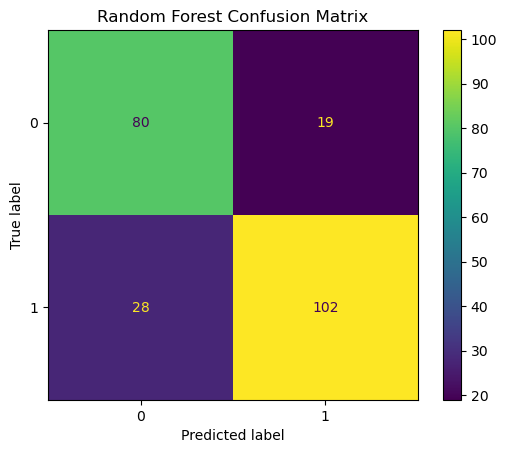

Classification report RF: 
               precision    recall  f1-score   support

           0       0.74      0.81      0.77        99
           1       0.84      0.78      0.81       130

    accuracy                           0.79       229
   macro avg       0.79      0.80      0.79       229
weighted avg       0.80      0.79      0.80       229



In [19]:
#tampilkan skor cross-validation
print("CV Score: {}".format(GSCV_RF.best_score_))
#tampilkan skor model terbaik GSCV pada test set
print("Test Score: {}".format(GSCV_RF.best_estimator_.score(x_test_enc, y_test)))
#tampilkan best model dan best features
print("Best model:", GSCV_RF.best_estimator_)

mask = GSCV_RF.best_estimator_.named_steps['feature select'].get_support()
print("Best features:", df_train_enc.columns[mask])

#buat prediksi dari test set
RF_pred = GSCV_RF.predict(x_test_enc)

import matplotlib.pyplot as plt
#buat confusion matrix
cm = confusion_matrix(y_test, RF_pred, labels=GSCV_RF.classes_)
#buat confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_RF.classes_)
disp.plot()

plt.title("Random Forest Confusion Matrix")
plt.show()
#tampilkan Classification report
print("Classification report RF: \n", classification_report(y_test, RF_pred))

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier 

pipe_GBT = Pipeline(steps=[
    ('feat_select',SelectKBest()),
    ('clf',GradientBoostingClassifier(random_state=0))])##random state isi dengan 2 digit npm terakhir

params_grid_GBT = [
    {
        'feat_select__k': np.arange(2,6),
     'clf__max_depth':[*np.arange(4,5)],
     'clf__n_estimators':[100,150],
     'clf__learning_rate': [0.01,0.1,1]      
    },
    {
        
        'feat_select':[SelectPercentile()],
        'feat_select__percentile':np.arange(20,50),
         'clf__max_depth':[*np.arange(4,5)],
         'clf__n_estimators':[100,150],
        'clf__learning_rate':[0.01,0.1,1]
    },
    {
        'feat_select__k': np.arange(2,6),
     'clf__max_depth':[*np.arange(4,5)],
     'clf__n_estimators':[100,150],
     'clf__learning_rate': [0.01,0.1,1]      
    },
    {
        
        'feat_select':[SelectPercentile()],
        'feat_select__percentile':np.arange(20,50),
         'clf__max_depth':[*np.arange(4,5)],
         'clf__n_estimators':[100,150],
        'clf__learning_rate':[0.01,0.1,1]
    }
]

GSCV_GBT = GridSearchCV(pipe_GBT,params_grid_GBT,cv=StratifiedKFold(n_splits=5))
GSCV_GBT.fit(x_train_enc,y_train)
print("GSCV Finished")


GSCV Finished


CV Score: 0.8471702105151804
Test Score: 0.8165938864628821
Best model: Pipeline(steps=[('feat_select', SelectPercentile(percentile=48)),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=4,
                                            n_estimators=150,
                                            random_state=0))])
Best features: Index(['onehotencoder__Sex_M', 'onehotencoder__ChestPainType_ASY',
       'onehotencoder__ChestPainType_ATA', 'onehotencoder__ExerciseAngina_N',
       'onehotencoder__ExerciseAngina_Y', 'onehotencoder__ST_Slope_Flat',
       'onehotencoder__ST_Slope_Up', 'remainder__Age', 'remainder__MaxHR',
       'remainder__Oldpeak'],
      dtype='object')


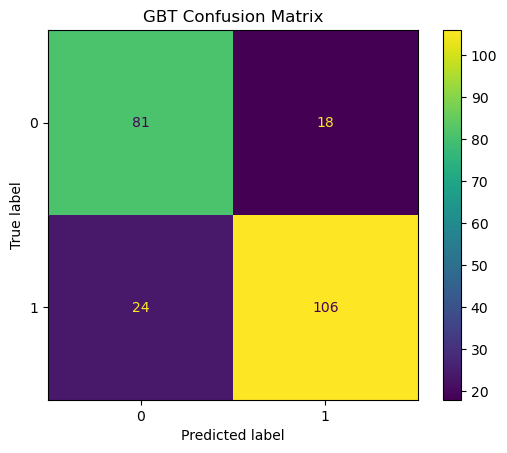

Classification report GBT: 
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.85      0.82      0.83       130

    accuracy                           0.82       229
   macro avg       0.81      0.82      0.81       229
weighted avg       0.82      0.82      0.82       229



In [21]:
#tampilkan skor cross-validation
print("CV Score: {}".format(GSCV_GBT.best_score_))
#tampilkan skor model terbaik GSCV pada test set
print("Test Score: {}".format(GSCV_GBT.best_estimator_.score(x_test_enc, y_test)))
#tampilkan best model dan best features
print("Best model:", GSCV_GBT.best_estimator_)

mask = GSCV_GBT.best_estimator_.named_steps['feat_select'].get_support()
print("Best features:", df_train_enc.columns[mask])

#buat prediksi dari test set
RF_pred = GSCV_GBT.predict(x_test_enc)

import matplotlib.pyplot as plt
#buat confusion matrix
cm = confusion_matrix(y_test, RF_pred, labels=GSCV_GBT.classes_)
#buat confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_GBT.classes_)
disp.plot()

plt.title("GBT Confusion Matrix")
plt.show()
#tampilkan Classification report
print("Classification report GBT: \n", classification_report(y_test, RF_pred))

### CATATAN

- silahkan untuk meng dump model dengan f1 score terbaik
- sebagai contoh, dalam modul ini model yang di dump adalah GBT dengan f1 score [0] 79% dan [1] 83%
- model yang di dump oleh setiap praktikan bisa berbeda beda, tergantung dari f1 score terbaiknya
- Setelah melakukan pelatihan dan pengujian model kita dapat menyimpan model menggunakan library Pickle.

In [24]:
import pickle

#simpan model menggunakan library Pickle
with open('GBT_heartDisease_model.pkl','wb') as r:
    pickle.dump((GSCV_GBT),r)

##File pickle akan tersimpan di folder yang sama dengan file notebook
print("Model GBT berhasill disimpan")

Model GBT berhasill disimpan


## Streamlit

- Sebelum membuat antarmuka, pastikan bahwa streamlit telah terinstalasi. Cek dengan membuka Anaconda Prompt dan ketik `pip install streamlit`.
- Setelah itu, buat file baru dengan ekstensi Python (.py) untuk antarmuka Streamlitm dan buatlah code berikut.

In [ ]:
#import library yang dibutuhkan
import streamlit as st
import pickle 
import os

#load model yang sudah dibuat dari Jupyter Notebook
model_path = 'D:\KULIAH\Semester 5\ASDOS\Modul 2\Model Preparation and Evaluation\Model Preparation and Evaluation'
model=os.path.join(model_path,'GBT_heartDisease_model.pkl')

with open(model,'rb') as f:
    loaded_model = pickle.load(f)
    
rf_model = loaded_model

#tampilan aplikasi Streamlit
st.title("Prediksi Potensi Penyakit Jantung")
st.write("Aplikasi ini berguna untuk membantu menenali potensi penyakit jantung pada manusia berusia 21 - 79 tahun")
Age = st.slider("Age",21,79)
Sex = st.selectbox("Gender",["F","M"])
ChestPainType = st.selectbox("Chest Pain Type",["ASY","ATA","NAP","TA"])
RestingBP = st.number_input("Resting Blood Preassure",0,200)
Cholesterol = st.number_input("Cholesterol", 0,603)
FastingBS = st.selectbox("Fasting BS",["1","0"])
RestingECG = st.selectbox("Resting ECG",["LVH","Normal","ST"])
MaxHR = st.number_input("Max Heart Rate",60,202)
ExcerciseAngina = st.radio("Excercise Angina",["N","Y"])
Old_peak = st.slider("Old Peak",-3.0,7.0,step=0.1)
ST_Slope=st.selectbox("ST_Slope",["Down","Flat","Up"])

#ubah opsi input menjadi "One-Hot" features
if Sex == "F":
    input_sex_F = 1
    input_sex_M =0
elif Sex == "M":
    input_sex_F = 0
    input_sex_M = 1

if ChestPainType == "ASY":
    input_cpain_ASY = 1
    input_cpain_ATA = 0
    input_cpain_NAP = 0
    input_cpain_TA = 0
elif ChestPainType == "ATA":
    input_cpain_ASY = 0
    input_cpain_ATA = 1
    input_cpain_NAP = 0
    input_cpain_TA = 0
elif ChestPainType == "NAP":
    input_cpain_ASY = 0
    input_cpain_ATA = 0
    input_cpain_NAP = 1
    input_cpain_TA = 0
elif ChestPainType == "TA":
    input_cpain_ASY = 0
    input_cpain_ATA = 0
    input_cpain_NAP = 0
    input_cpain_TA = 1

if FastingBS == 0:
    input_fastbs = 0
else:
    input_fastbs = 1

if RestingECG == "LVH":
    input_restecg_LVH = 1
    input_restecg_NORMAL = 0
    input_restecg_ST = 0
elif RestingECG == "Normal":
    input_restecg_LVH = 0
    input_restecg_NORMAL = 1
    input_restecg_ST = 0
elif RestingECG == "ST":
    input_restecg_LVH = 0
    input_restecg_NORMAL = 0
    input_restecg_ST = 1

if ExcerciseAngina == ["Y"]:
    input_anginaY = 1
    input_anginaN = 0
else:
    input_anginaY = 0
    input_anginaN = 1

if ST_Slope == "Down":
    input_STslope_down = 1
    input_STslope_flat = 0
    input_STslope_up = 0
elif ST_Slope == "Flat":
    input_STslope_down = 0
    input_STslope_flat = 1
    input_STslope_up = 0
elif ST_Slope == "Up":
    input_STslope_down = 0
    input_STslope_flat = 0
    input_STslope_up = 1

#buat input ke dalam numpy array
input_data = [[input_sex_F,input_sex_M,input_cpain_ASY,
               input_cpain_ATA,input_cpain_NAP,input_cpain_TA,
               input_restecg_LVH,input_restecg_NORMAL,input_restecg_ST,
               input_anginaN,input_anginaY,input_STslope_down,
               input_STslope_flat,input_STslope_up,Age,
               RestingBP,Cholesterol,input_fastbs,MaxHR,Old_peak]]

#tampilkan data yang akan diinputkan
st.write("Data pasien yang akan diinput ke model")
st.write(input_data)

#buat fungsi untuk prediksi
if st.button("Prediksi"):
    rf_model_prediction = rf_model.predict(input_data)
    outcome= {0:'Tidak Berpotensi sakit jantung', 1:'Berpotensi sakit jantung'}
    st.write(f"Orang tersebut diprediksi **{outcome[rf_model_prediction[0]]}**")


- Buka terminal dengan CTRL+Shift+`, kemudian ketik `conda activate base` untuk memastikan environment Anaconda sudah berjalan
- Untuk menjalankan projek Streamlit, ketik `streamlit run (path file)`
- Contoh : `streamlit run "D:\Kuliah\Semester 5\diabetes_streamlit.py"`
- Ketika dijalankan, secara otomatis akan otomatis terbuka tab baru di browser

## DATA UNTUK TESTING
#### data berpotensi sakit jantung : 
- 48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat
- 37,M,ASY,140,207.0,0,Normal,130,Y,1.5,Flat		

#### data tidak berpotensi sakit jantung : 
- 54,M,ATA,110,208.0,0,Normal,142,N,0.0,Up
- 54,F,ATA,120,273.0,0,Normal,150,N,1.5,Flat				
			

                                  
